# Unsupervised Learning With DBSCAN

## Overview

K-means is a centroid based, hard clustering methodology that requires the number of clusters to be formed as an input.
If we don't have the domain knowledge to utilize, this requirement may be problematic. The elbow or Silhouette methods can be
used in order to determine the required number of clusters. This however can be difficult to apply for large datasetsas as it requires running the 
algorithm several times. And the Silhouette score is particularly expensive to compute.

In this section, we will discuss <a href="https://en.wikipedia.org/wiki/DBSCAN">DBSCAN</a>. This is an acronym for _Density-based spatial clustering
of applications with noise_. DBSCAN is a density-based clustering non-parametric algorithm that does not require the number of clusters as an input.
Instead, given a set of points in some space, it groups together points that are closely packed together i.e points with many nearby neighbors, marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most commonly used, and cited, clustering algorithms [1].

## Unsupervised learning ith DBSCAN

K-means uses   centroids in order to construct clusters of points. A density-base approach defines
clusters as sets of points that are close to each other such that these points define a desnity 
that in any area of the cluster is above a certain threshold. DBSCAN extends the concept of <a href="https://en.wikipedia.org/wiki/Single-linkage_clustering">single-linkage clustering</a> by introducing a minimum points-density in order to consider two points connected to each other [2].


In order to understand how DBSCAN works there are few definitions we need [2]

- **Core point**: A data point $p$ is said to be a core point if within a predefined distance $\epsilon$ from it, there are at least a predefined minimumum number of points.
- **Directly reachable**: A data point $q$ is directly reachable from a core point $p$ if $q$ lies within distance $\epsilon$ from $p$
- **Reachable or density-reachable** A point $q$ is reachable from a core point $p$ through a path of core points $p=q_1,\dots, q_n=q$, if each $q_{i+1}$ is directly reachable from $q_i$. 

In DBSCAN, any two points that are density-reachable from each other belong to the same cluster.
If a point is not reachable from any other point in the dataset is considered and outlier.
Note that two core points that are reachable to each other belong to the same cluster.

The following box  outlines how the algorithm works.

----
**Algorithm: DBSCAN**

1. Input

    - $\epsilon$
    - $N_{min}$ minimum number of points
    - Distance metric

2. For every point $p$  in the dataset $\mathbf{D}$
    
    - Check how many of its neighbors lie within a radius $\epsilon$
    - if this number is more than $N_{min}$ mark $p$ as a core point and add its neighbors to to the same cluster
     
----

As can be seen from the algorithm above, DBSCAN is a rather simple algorithm. However let's examine some edge cases. If a point $q$ is not a core point
but is directly reachable from a core point $p$, then $q$ must lie within diatnce $\epsilon$ from $p$. Therefore it should end up in the same cluster as $p$.
If two core point are density-reachable, eventually these points should be merged in the same cluster.

The way we process the points does not affect the final partitioning [2]. However, some approaches are better than others.
For example processing points completely randomly, implies that we would need to keep track of the cluster assigned to each point.
It also means that we need to track which clusters have to be merged; every time we discover a core point, we need to merge at least
$N_{min}- 1$ clusters. This can be complicated [2].

Alternatively, we can process the neighbors of a core point $p$ immediately after $p$.
This way, we build clusters in a sequence; each cluster grows point by point unitl no further point
can be added to it without any need of merging clusters [2].

Edge points can be added to any of the clusters from which they are reachable. However, the 
final result depends on the order we process the data points [2]. 
Notice also that DBSCAN, in contrast to K-means, process each point exactly once.
DBSCAN is a one-pass deterministic algorithm computing the best partitioning (and at
the same time identifying outliers) based on the  density of a point in different areas [2].


The next section discusses some advantages and disadvantages of DBSCAN.


## Advantages and disadvantages of DBSCAN

Perhaps one of the biggest advanatages of DBSCAN is that it does not need one to
specify the number of clusters. In addition, it does not depend on many hyperparameters.
The algorithm  can also handle noise in the datasets by identifying outliers.
DBSCAN can find arbitrarily shaped clusters and can partition non-linearly separable
clusters [2]. By tuning the parameter $N_{min}$, it is possible to reduce the single-link
effect. Finally, the algorithm is almost entirely deterministic and the order in which points
are processed is mostly irrelevant. Indeed, a different order can only change the assign-
ment of points on the edge of clusters when they are equally close to more than
one cluster [2]


However, the algorithm has certain disadvantages which are listed below see also [2].

Although DBSCAN is almost entirely deterministic, for some applications, it might be a problem if points at the border of two or more clusters are
aleatorily assigned to one or another. The algorithm also suffers from the curse of dimensionality. If the metric used is the
Euclidean distance, then in high-dimensional spaces all neighbors of a point are at the same distance, and the distance function
becomes basically useless.  When the  dataset has areas with different densities, it can be  challenging, or even impossible, to choose parameters $\epsilon$ and $N_{min}$ such that all clusters will be partitioned correctly. In line with the last argument, it may be difficult
to find the best values for its parameters when no previous knowledge of the dataset exists [2].


## Example 1

In this example we will use DBSCAN from scikit-learn. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

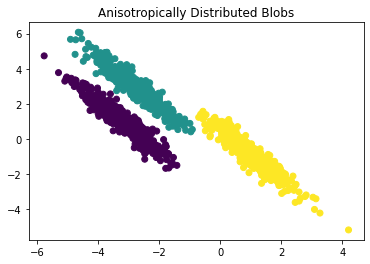

In [2]:
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
plt.title("Anisotropically Distributed Blobs")
plt.show()

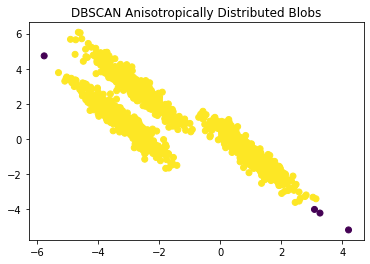

In [4]:
dbscan = DBSCAN()
y_pred = dbscan.fit_predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("DBSCAN Anisotropically Distributed Blobs")
plt.show()

As can be seen, running DBSCAN with the default arguments, fails to identify the three blobs. It does however capture what seems to
be outliers.

## Summary

Like k-means, DBSCAN is a flat hard-clustering algorithm, meaning that each
point is assigned to (at most) one cluster (or no cluster, for outliers) with 100% confi-
dence, and that all clusters are objects at the same level, no hierarchy of these groups
is kept.

In k-means, random initialization of the centroids has a major role in the algo-
rithm (with good choices speeding up convergence), so much so that often several
random restarts of the algorithm are compared before choosing the best clustering.
This isn’t true for DBSCAN, where points are cycled through somewhat randomly. But
this has a lower influence, if any, on the final result; therefore, this algorithm can be
considered deterministic.14

DBSCAN is a very popular clustering algorithm. In 2014, the algorithm was awarded the test of time award [1].  As of July 2020, the follow-up paper _DBSCAN Revisited, Revisited: Why and How You Should (Still) Use DBSCAN_ appears in the list of the 8 most downloaded articles of the prestigious ACM Transactions on Database Systems journal [1].

## References

1. <a href="https://en.wikipedia.org/wiki/DBSCAN">DBSCAN</a>
2. Marcello la Rocca, _Advanced Algorithms and Data Structrues_, Manning Publications, 2021.
2. <a href="https://dl.acm.org/doi/10.1145/3068335">_DBSCAN Revisited, Revisited: Why and How You Should (Still) Use DBSCAN_</a>